# Laboratory practice № 10 (Linear Quadratic Regulators & Estimators)

Done by Vladislav Diuzhev (isu: 336225, group: R33353)

Variant: 8

## Preparation

In [1]:
import matplotlib.pyplot as plt
import control as ctrl
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
import scipy
import cvxpy as cp

In [7]:
A = np.array([
    [6, 26, 4, 17],
    [0, 9, 0, 6],
    [-10, -35, -6, -25],
    [0, -15, 0, -9]
])

B = np.array([
    [7, 0],
    [2, 0],
    [-10, 0],
    [-4, 0]
]) 

C = np.array([
    [-2, 6, -4, 2],
    [0, -4, 2, 0]
])

D = np.array([
    [0, 0],
    [0, 3]
])

## Task 1

In [9]:
Qs = [np.eye(4)*i for i in [1, 10, 100]]
Rs = [np.eye(2)*i for i in [100, 10, 1]]

In [15]:
Ks, Ps = [], []
for q, r in zip(Qs, Rs):
    K, P, _ = ctrl.lqr(A,B,q,r)
    Ks.append(K.copy())
    Ps.append(P.copy())

In [16]:
np.linalg.eigvals(A - B@Ks[0])

array([-0.0991784 +2.05887259j, -0.0991784 -2.05887259j,
       -0.70030212+2.90108654j, -0.70030212-2.90108654j])

## Task 2

Done

## Task 3

In [73]:
stds_Q = [1, 5, 10]
stds_R = [1, 5, 10]

In [11]:
def generate_Kalman(a, c, std_q, std_r):
    q, r = np.diag(std_q)**2, np.diag(std_r)**2
    l, p, _ = ctrl.lqe(a,np.eye(4),c,q,r)
    return l, p 

In [71]:
def observe_Kalman(a,c,std_q,std_r,std_f,std_xi,t):
    l, _ = generate_Kalman(a,c,std_q,std_r)
    f, xi = np.random.normal(0,std_f,(len(t),4)), np.random.normal(0,std_xi,(len(t),2))
    sys = ctrl.ss(a, np.eye(4),c,0)
    sys_obs = ctrl.ss(a - l@c,l,c,0) 
    y = ctrl.forced_response(sys,t,X0=np.ones((4,1)),U=f.reshape((4,-1)))
    y_obs = ctrl.forced_response(sys_obs,t,X0=np.array([[10],[4],[-10],[5]]),U=y.outputs+xi.reshape((2,-1)))
    fig, ax = plt.subplots(2,3,figsize=(10,6))
    fig.suptitle(f"$\sigma_f={std_f}$, $\sigma_\\xi={std_xi}$, $Q=diag({std_q})^2$, $R=diag({std_r})^2$")
    ax[0,0].plot(t, y.states[0],label="$x_1$")
    ax[0,0].plot(t, y_obs.states[0],"r--",label="$\hat{x}_1$")
    ax[0,0].grid()
    ax[0,0].legend()
    
    ax[0,1].plot(t, y.states[1],label="$x_2$")
    ax[0,1].plot(t, y_obs.states[1],"r--",label="$\hat{x}_2$")
    ax[0,1].grid()
    ax[0,1].legend()
    
    ax[0,2].plot(t, y.states[2],label="$x_2$")
    ax[0,2].plot(t, y_obs.states[2],"r--",label="$\hat{x}_2$")
    ax[0,2].grid()
    ax[0,2].legend()
    
    ax[1,0].plot(t, y.states[3],label="$x_2$")
    ax[1,0].plot(t, y_obs.states[3],"r--",label="$\hat{x}_2$")
    ax[1,0].grid()
    ax[1,0].legend()
    
    ax[1,1].plot(t, y.outputs[0] + xi.reshape((2,-1))[0],label="$y_1$")
    ax[1,1].plot(t, y_obs.outputs[0],"--",label="$\hat{y}_1$")
    ax[1,1].grid()
    ax[1,1].legend()
    
    ax[1,2].plot(t, y.outputs[1] + xi.reshape((2,-1))[1],label="$y_2$")
    ax[1,2].plot(t, y_obs.outputs[1],"--",label="$\hat{y}_2$")
    ax[1,2].grid()
    ax[1,2].legend()

In [72]:
time_3 = np.linspace(0,5,int(5/0.001))

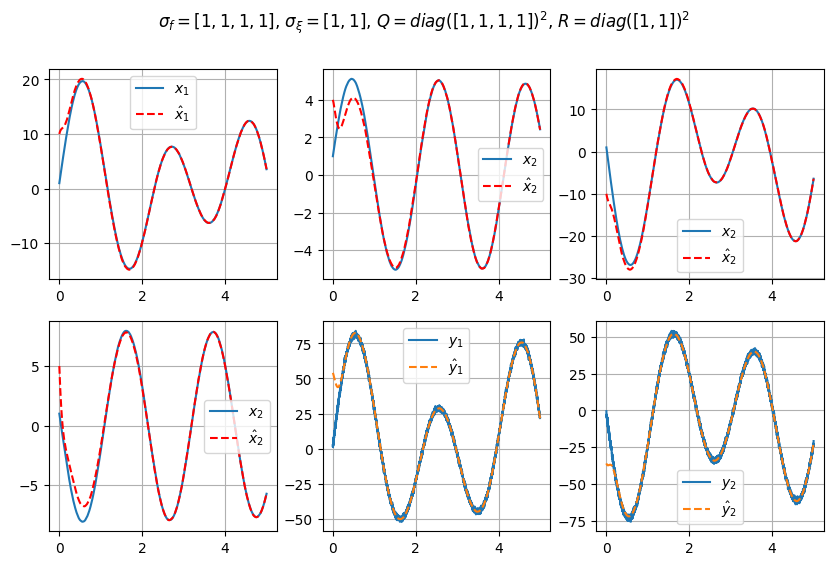

In [74]:
std_q, std_r = [1,1,1,1], [1,1]
std_f, std_xi = [1,1,1,1], [1,1]
observe_Kalman(A,C,std_q,std_r,std_f,std_xi,time_3)

In [80]:
# Ls, Ps = [], []
# for q, r in zip(Qs, Rs):
#     L, P, _ = ctrl.lqe(A,np.eye(4),C,q,r)
#     Ls.append(L.copy())
#     Ps.append(P.copy())
L, P, _ = ctrl.lqe(A,np.eye(4),C,Qs[0],Rs[2])

In [82]:
time_3 = np.linspace(0,5,int(5/0.001))


In [91]:
system_3 = ctrl.ss(A, np.eye(4),C,0)
systems_3_obs = ctrl.ss(A - L@C,L,C,0) 
y_3 = ctrl.forced_response(system_3,time_3,X0=np.ones((4,1)),U=f.reshape((4,-1)))
ys_3_obs = ctrl.forced_response(systems_3_obs,time_3,X0=np.array([[2],[0],[0],[-1]]),U=y_3.outputs+xi.reshape((2,-1)))

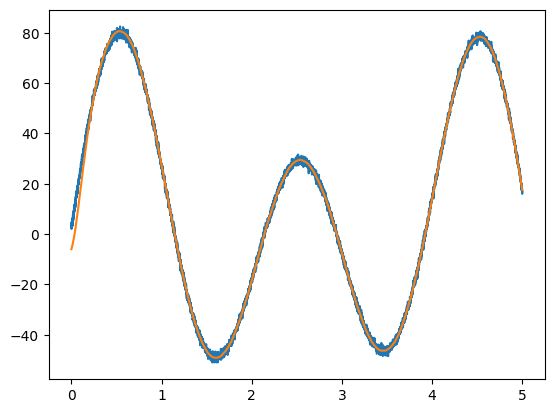

In [96]:
plt.plot(time_3,y_3.outputs[0]+xi.reshape((2,-1))[0])
plt.plot(time_3,ys_3_obs.outputs[0])

In [90]:
xi.mean(), f.mean(), xi.std(), f.std()

(-0.003028857302925958,
 0.0111388397914794,
 1.0084146620864893,
 1.0061078939326926)